In [ ]:
# # データの分割（学習データとテストデータ分けるモジュール）
from sklearn.model_selection import train_test_split
# # モデル
# from sklearn import linear_model
# #モデルのインスタンス
# l_model = linear_model.LinearRegression()
# # 説明変数に "price" 以外を利用
# X = sub_auto_data.drop("price", axis=1)
# # 目的変数
# Y = sub_auto_data["price"]
# # 学習データとテストデータ分ける
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5,（テストサイズはテストデータと学習データの割合みたいな）random_state=0)
# # モデルのあてはめ
# clf = l_model.fit(X_train,y_train)
# print("train:",clf.__class__.__name__ ,clf.score(X_train,y_train))
# print("test:",clf.__class__.__name__ , clf.score(X_test,y_test))
#  # 偏回帰係数
# print(pd.DataFrame({"Name":X.columns,
# "Coefficients":clf.coef_}).sort_values(by='Coefficients') )
# # 切片
# print(clf.intercept_)

# # ロジスティック回帰
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import train_test_split
# # 説明変数と目的変数
# X = adult_data[["age","fnlwgt","education-num","capital-gain","capital-loss"]]
# 中にリストで与えて複数選択
# Y = adult_data['fin_flg']
# # 学習データとテストデータに分ける
# X_train, X_test, y_train, y_test = train_test_split(X,Y,random_state=0)
# # ロジスティック回帰のインスタンス
# model = LogisticRegression()
# clf = model.fit(X_train,y_train)
# print("train result:",clf.score(X_train,y_train))
# print("test result:" , clf.score(X_test,y_test))


In [154]:
# データの分割（学習データとテストデータ分けるモジュール）
from sklearn.model_selection import train_test_split
# モデル
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import cross_val_score

plt.rcParams['savefig.bbox'] = 'tight'
train_df = pd.read_csv("train.csv").pipe(lambda df: df[(df["price_am"] != -1) & (df["price_pm"] != -1)])
test_df = pd.read_csv("test.csv")
submit_df = pd.DataFrame(columns = ["datetime", "y"])

In [155]:
# 年月日のカラムを定義
train_df["datetime"] = pd.to_datetime(train_df["datetime"])
train_df["year"] = train_df["datetime"].dt.year
train_df["month"] = train_df["datetime"].dt.month
train_df["day"] = train_df["datetime"].dt.day
submit_df["datetime"] = test_df["datetime"]

/Users/nakatatoshinori/.pyenv/versions/3.6.1/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['Osaka'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/nakatatoshinori/.pyenv/versions/3.6.1/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


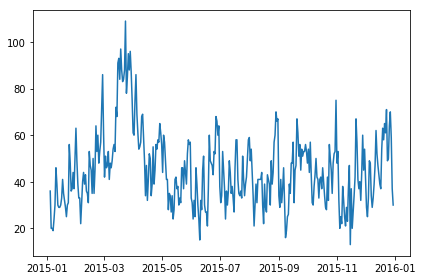

In [153]:
plt.plot(train_df[train_df["year"]==2015].groupby("datetime")["y"].sum())

In [129]:
# submit_dfでclose0のtargetを0にしたい
close_index = test_df[test_df["close"] == 1].index


#     if (test_df[test_df.index.isin([num])]["close"] == 1).bool() == True:
#         submit_df["y"]=0
submit_df[submit_df.index.isin(close_index)]["y"].map(0)

submit_df[submit_df.index.isin(close_index)]["y"]=0
submit_df[submit_df.index.isin(close_index)]

TypeError: 'int' object is not callable

In [136]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1889 entries, 187 to 2100
Data columns (total 9 columns):
datetime    1889 non-null datetime64[ns]
y           1889 non-null int64
client      1889 non-null int64
close       1889 non-null int64
price_am    1889 non-null int64
price_pm    1889 non-null int64
year        1889 non-null int64
month       1889 non-null int64
day         1889 non-null int64
dtypes: datetime64[ns](1), int64(8)
memory usage: 227.6 KB


In [79]:
test_df[test_df.index.isin([1])]

,datetime,client,close,price_am,price_pm
1,2016-04-02,0,0,5,5


In [60]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1889 entries, 187 to 2100
Data columns (total 9 columns):
datetime    1889 non-null datetime64[ns]
y           1889 non-null int64
client      1889 non-null int64
close       1889 non-null int64
price_am    1889 non-null int64
price_pm    1889 non-null int64
year        1889 non-null int64
month       1889 non-null int64
day         1889 non-null int64
dtypes: datetime64[ns](1), int64(8)
memory usage: 227.6 KB


In [61]:
X = train_df.drop(["y", "datetime"], axis=1)
Y = train_df.y
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=0)

In [65]:
# X = train_df.drop(["y", "datetime", "day"], axis=1)
# Y = train_df.y
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=0)
# # 年月
# # モデルのあてはめ
# #モデルのインスタンス
# l_model = linear_model.LinearRegression()
# clf = l_model.fit(X_train,y_train)
# print("train:",clf.__class__.__name__ , clf.score(X_train,y_train))
# print("test:",clf.__class__.__name__ , clf.score(X_test,y_test))
#  # 偏回帰係数
# print(pd.DataFrame({"Name":X.columns,
# "Coefficients":clf.coef_}).sort_values(by='Coefficients') )
# # 切片
# print(clf.intercept_)

train: LinearRegression 0.631277552953
test: LinearRegression 0.621938269834
   Coefficients      Name
5 -2.904700e-02     month
0 -1.580946e-02    client
1  1.412959e-14     close
3  3.058808e+00  price_pm
4  6.035499e+00      year
2  6.486138e+00  price_am
-12120.9048849


In [159]:
X = train_df.drop(["y", "datetime","close"], axis=1)
Y = train_df.y
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=0)
# 年月日
# モデルのあてはめ
#モデルのインスタンス
l_model = linear_model.LinearRegression()
clf = l_model.fit(X_train,y_train)
print("train:",clf.__class__.__name__ , clf.score(X_train,y_train))
print("test:",clf.__class__.__name__ , clf.score(X_test,y_test))
 # 偏回帰係数
print(pd.DataFrame({"Name":X.columns,
"Coefficients":clf.coef_}).sort_values(by='Coefficients') )
# 切片
print(clf.intercept_)
# 交差検証法

# cv　で分割数を決定する。デフォルトは3。
scores = cross_val_score(clf,X_train,y_train,cv=5)

print("Cross validation scores:{}".format(scores))
print("Cross validation scores(mean):{}".format(scores.mean()))

train: LinearRegression 0.647049541778
test: LinearRegression 0.646006719033
   Coefficients      Name
4     -0.047069     month
5      0.244814       day
0      0.428725    client
2      2.605864  price_pm
3      6.039026      year
1      6.345669  price_am
-12131.4218926
Cross validation scores:[ 0.66444526  0.5571081   0.64295204  0.69544626  0.63161163]
Cross validation scores(mean):0.6383126575081824


In [160]:
X = train_df.drop(["y", "datetime"], axis=1)
Y = train_df.y
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=0)
# 年月日
# モデルのあてはめ
#モデルのインスタンス
l_model = linear_model.LinearRegression()
clf = l_model.fit(X_train,y_train)
print("train:",clf.__class__.__name__ , clf.score(X_train,y_train))
print("test:",clf.__class__.__name__ , clf.score(X_test,y_test))
 # 偏回帰係数
print(pd.DataFrame({"Name":X.columns,
"Coefficients":clf.coef_}).sort_values(by='Coefficients') )
# 切片
print(clf.intercept_)
# 交差検証法

# cv　で分割数を決定する。デフォルトは3。
scores = cross_val_score(clf,X_train,y_train,cv=5)

print("Cross validation scores:{}".format(scores))
print("Cross validation scores(mean):{}".format(scores.mean()))

train: LinearRegression 0.647049541778
test: LinearRegression 0.646006719033
   Coefficients      Name
5 -4.706851e-02     month
1 -9.567063e-15     close
6  2.448136e-01       day
0  4.287253e-01    client
3  2.605864e+00  price_pm
4  6.039026e+00      year
2  6.345669e+00  price_am
-12131.4218926
Cross validation scores:[ 0.66444526  0.5571081   0.64295204  0.69544626  0.63161163]
Cross validation scores(mean):0.6383126575081837


In [ ]:
# 決定木
from sklearn import tree
from sklearn.tree import  DecisionTreeClassifier

# 決定木インスタンス（エントロピー、深さ5）
tree_model = DecisionTreeClassifier(criterion='entropy',max_depth=5, random_state=50)

tree_model.fit(X_train,y_train)

print("train:",tree_model.__class__.__name__ ,tree_model.score(X_train,y_train))
print("test:",tree_model.__class__.__name__ , tree_model.score(X_test,y_test))